In [86]:
from data_reading import train_dataset, test_dataset, val_dataset, cls_names
from data_reading import train_data, test_data, val_data

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [88]:
labels = list(train_data)[0][1].numpy()

In [89]:
batch_data = pd.DataFrame({'lbl': labels})
batch_data.head()

,lbl
0,2
1,4
2,5
3,4
4,0


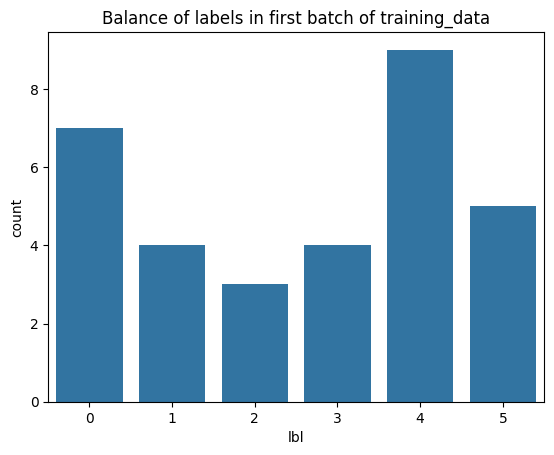

In [90]:
plt.title('Balance of labels in first batch of training_data')
sns.countplot(data=batch_data, x='lbl');

In [91]:
import tensorflow as tf

In [92]:
train_for_plotting = tf.keras.utils.image_dataset_from_directory(
    'seg_train',
    validation_split=0.2,
    subset='training',
    image_size=(150, 150),
    seed=100,
    batch_size=1
)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


In [93]:
lbls = []

In [94]:
for img, lbl in train_for_plotting:
    lbls.append(int(lbl[0]))

In [95]:
lbls[:5]

[4, 2, 5, 4, 4]

In [96]:
batch_data = pd.DataFrame({'lbl': lbls})
batch_data.head()

,lbl
0,4
1,2
2,5
3,4
4,4


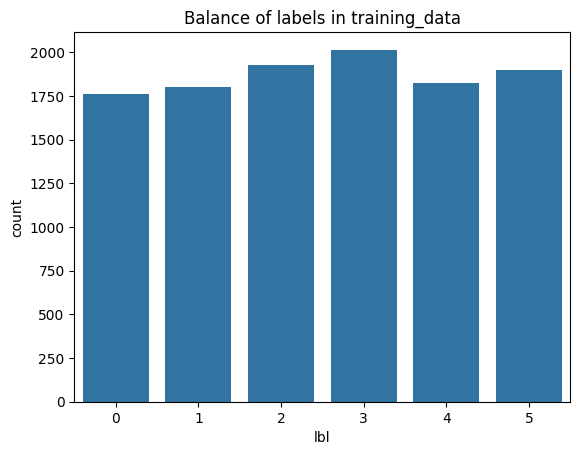

In [97]:
plt.title('Balance of labels in training_data')
sns.countplot(data=batch_data, x='lbl');

In [98]:
# 👆That's good👆

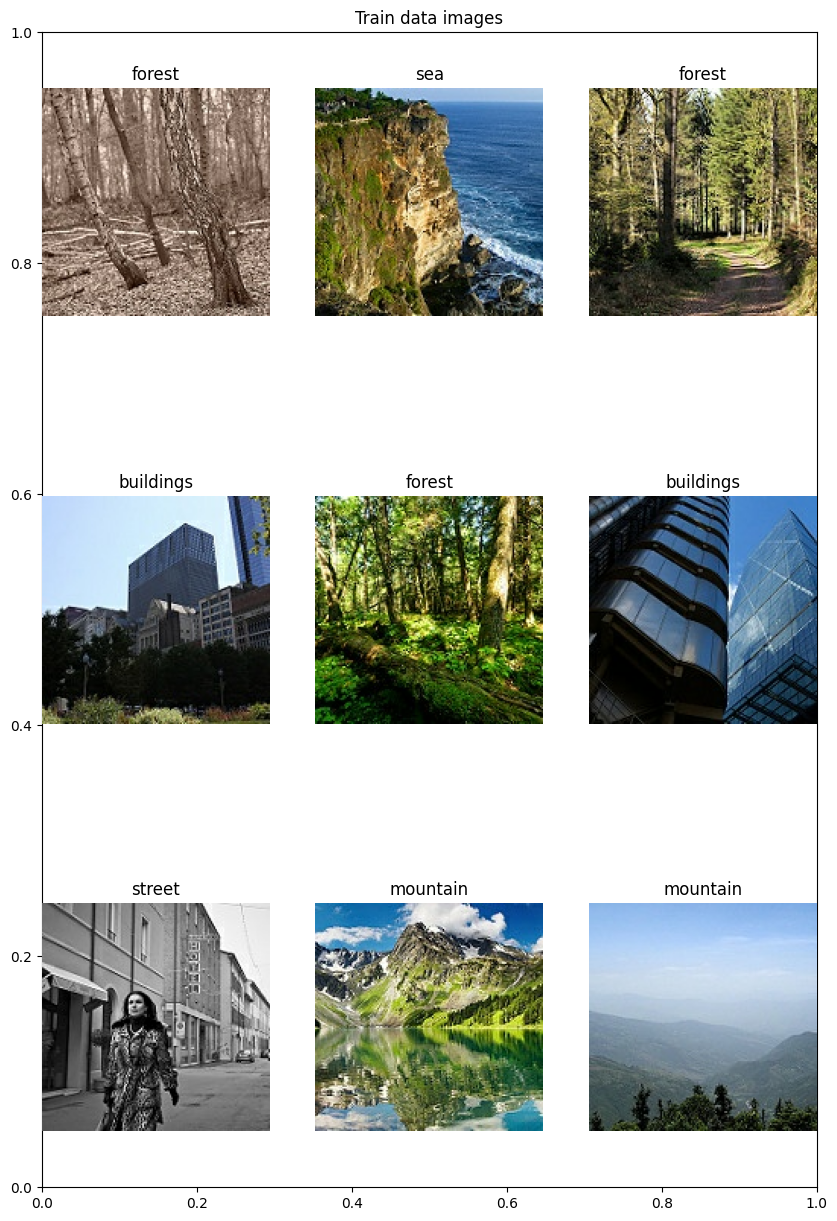

In [99]:
plt.figure(figsize=(10, 15))
plt.title('Train data images')
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(cls_names[labels[i]])
    plt.axis("off")

In [100]:
cls_names_test = test_data.class_names 

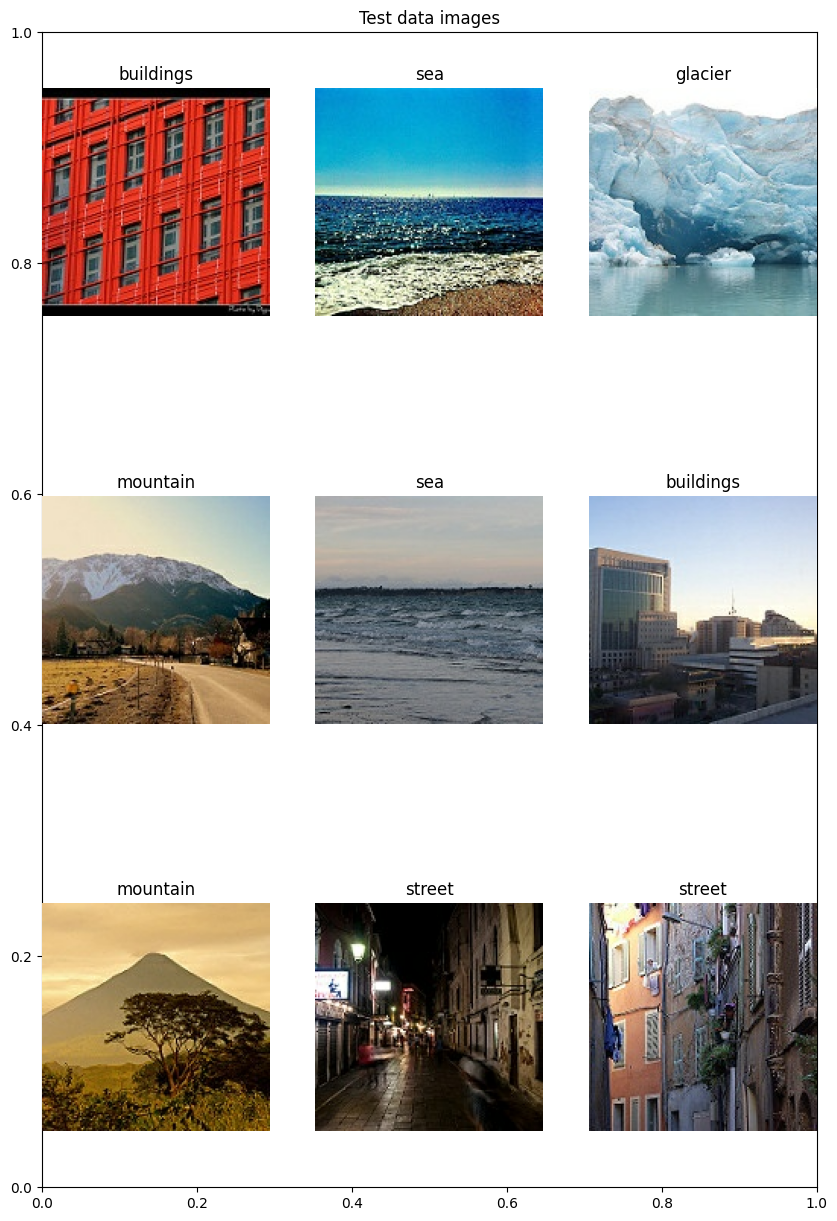

In [101]:
plt.figure(figsize=(10, 15))
plt.title('Test data images')
for images, labels in test_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(cls_names_test[labels[i]])
    plt.axis("off")

In [102]:
cls_names_val = val_data.class_names

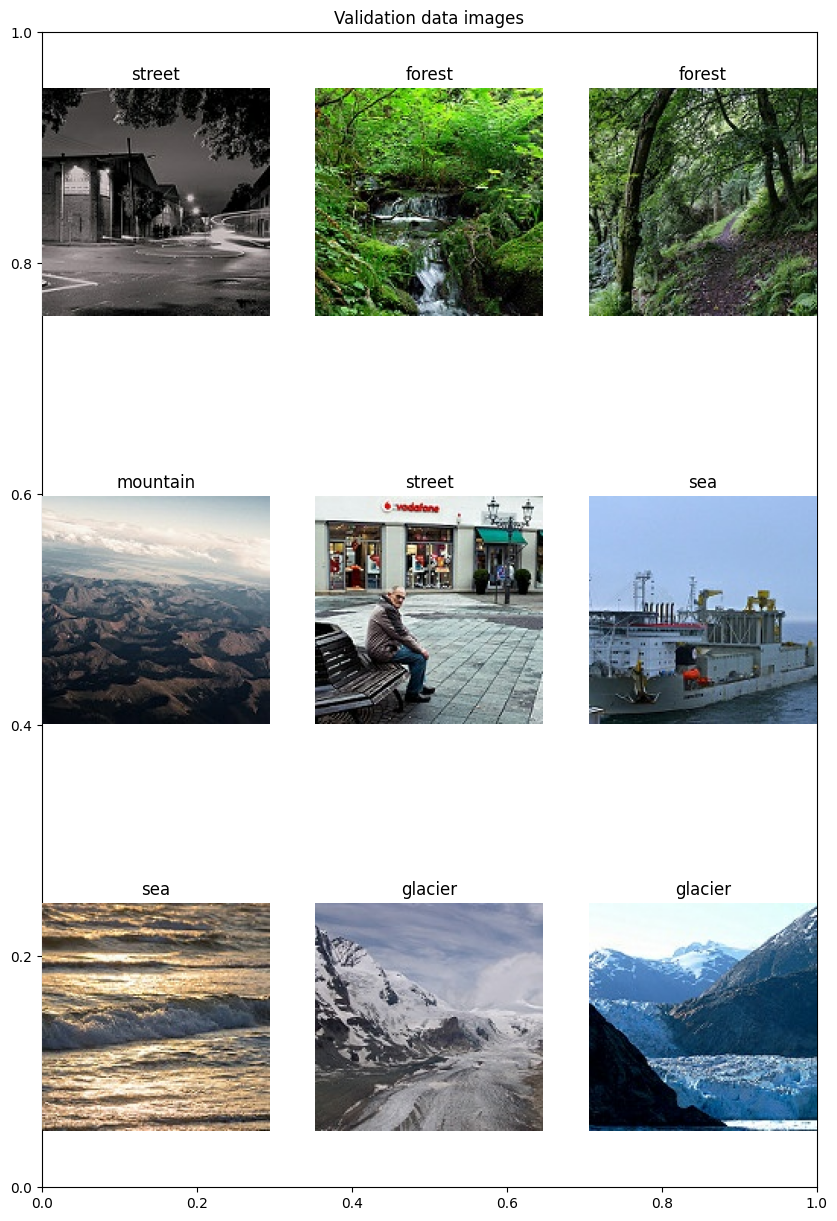

In [103]:
plt.figure(figsize=(10, 15))
plt.title('Validation data images')
for images, labels in val_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(cls_names_val[labels[i]])
    plt.axis("off")